In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K

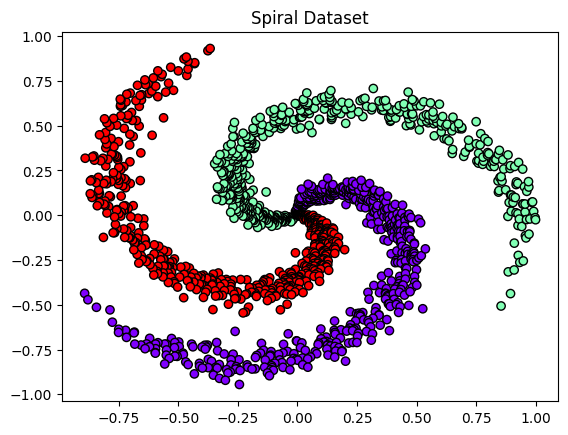

In [3]:
# Generate a spiral dataset
def generate_spiral_data(n_points, n_classes):
    X = []
    y = []
    for j in range(n_classes):
        ix = range(n_points * j, n_points * (j + 1))
        r = np.linspace(0.0, 1, n_points)  # radius
        t = np.linspace(j * 4, (j + 1) * 4, n_points) + np.random.randn(n_points) * 0.2  # theta
        X.extend(np.c_[r * np.sin(t), r * np.cos(t)])
        y.extend([j] * n_points)
    return np.array(X), np.array(y)

# Generate data
n_points = 500  # Points per class
n_classes = 3   # Number of classes
X, y = generate_spiral_data(n_points, n_classes)

# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', edgecolor='k')
plt.title("Spiral Dataset")
plt.show()

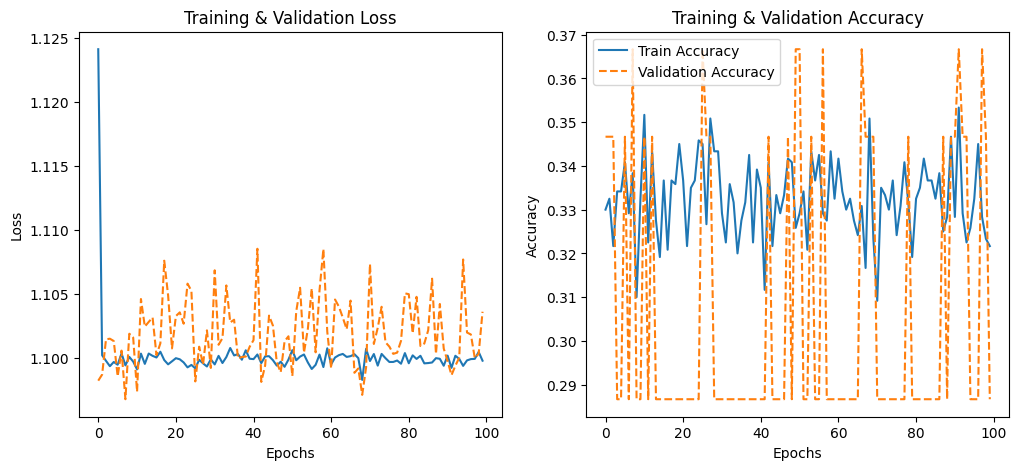

Final Training Accuracy: 0.3217
Final Validation Accuracy: 0.2867
Test Accuracy: 0.2867


In [6]:
# Clear the Keras session to reset everything
K.clear_session()

# Re-load data and one-hot encode labels
X, y = generate_spiral_data(n_points, n_classes)  # Replace with actual data loading process

# Task 1: Vanishing/Exploding Gradients.
# One-Hot Encoding & Data Splitting.
y = to_categorical(y, num_classes=n_classes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Model with ReLU Activation & Batch Normalization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(n_classes, activation='softmax')
])

# Compile Model.
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

# Plot Loss & Accuracy for Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')

plt.legend()
plt.show()

# Get Training Accuracy
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

# Get Testing Accuracy
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Print Results
print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


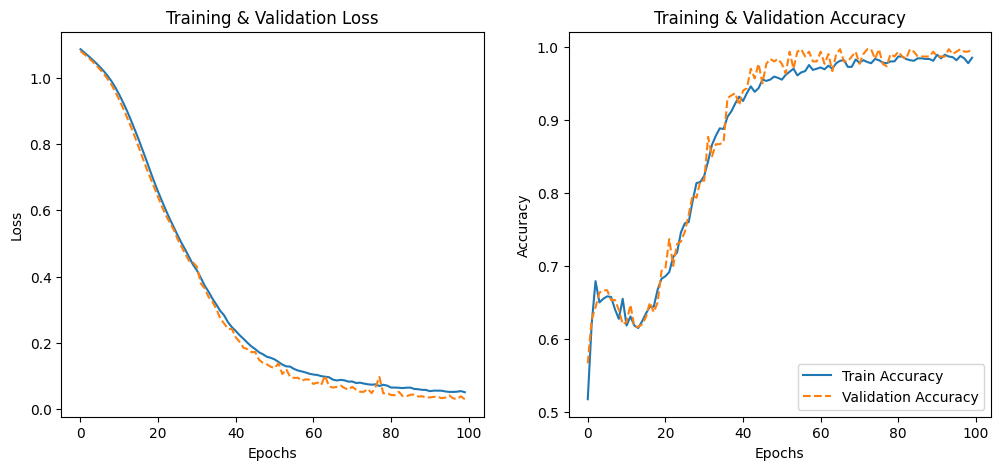

Final Training Accuracy: 0.9850
Final Validation Accuracy: 0.9967
Test Accuracy: 0.9967


In [ ]:
# Task 2: Improving Training. Experiment 1 - Change Activation Function from Sigmoid to ReLU.
# Clear the Keras session to reset everything
K.clear_session()

# Re-load data and one-hot encode labels
X, y = generate_spiral_data(n_points, n_classes)  # Replace with actual data loading process

# Task 1: Vanishing/Exploding Gradients.
# One-Hot Encoding & Data Splitting.
y = to_categorical(y, num_classes=n_classes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Model with ReLU Activation & Batch Normalization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax')
])

# Compile Model.
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

# Plot Loss & Accuracy for Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')

plt.legend()
plt.show()

# Get Training Accuracy
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

# Get Testing Accuracy
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Print Results
print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

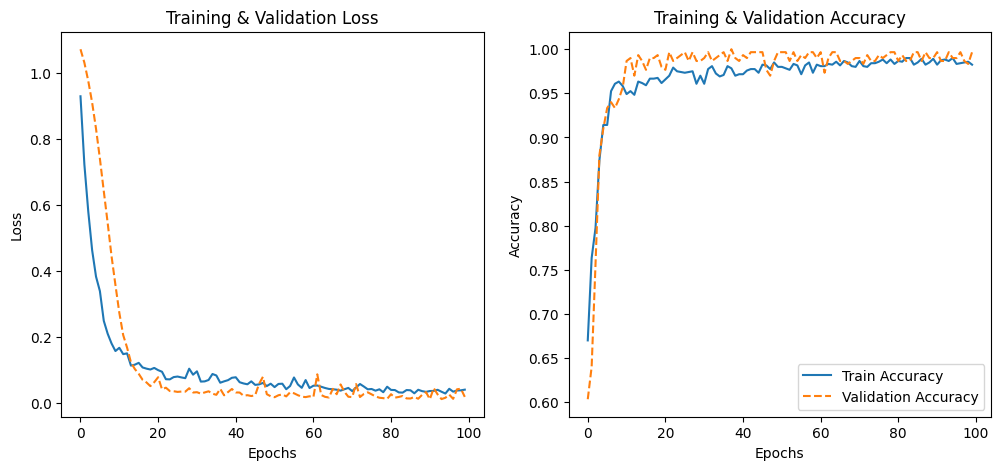

Final Training Accuracy: 0.9825
Final Validation Accuracy: 0.9967
Test Accuracy: 0.9967


In [ ]:
# Task 2: Improving Training. Experiment 2 - Added Batch Normalization.
# Clear the Keras session to reset everything
K.clear_session()

# Re-load data and one-hot encode labels
X, y = generate_spiral_data(n_points, n_classes)  # Replace with actual data loading process

# Task 1: Vanishing/Exploding Gradients.
# One-Hot Encoding & Data Splitting.
y = to_categorical(y, num_classes=n_classes)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Model with ReLU Activation & Batch Normalization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax')
])

# Compile Model.
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

# Plot Loss & Accuracy for Visualization
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')

plt.legend()
plt.show()

# Get Training Accuracy
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

# Get Testing Accuracy
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Print Results
print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Validation Accuracy: {val_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")